
## About Dataset

https://www.kaggle.com/datasets/kartik2112/fraud-detection/data?select=fraudTest.csv

fraudTrain.csv:
- 1296675 points

fraudTest.csv:
- 555719 points


Features:
- Unnamed: 0 - Unique identifier for each transaction (integer).
- trans_date_trans_time - Transaction timestamp in datetime format (object).
- cc_num - Credit card number (integer).
- merchant - Merchant where the transaction occurred (categorical string).
- category - Type of merchant (e.g., grocery, travel) (categorical string).
- amt - Transaction amount in dollars (float).
- first - First name of the cardholder (string).
- last - Last name of the cardholder (string).
- gender - Gender of the cardholder (categorical string).
- street - Street address of the cardholder (string).
- city - City of the cardholder (categorical string).
- state - State of the cardholder (categorical string).
- zip - ZIP code of the cardholder (integer).
- lat - Latitude of the cardholder’s location (float).
- long - Longitude of the cardholder’s location (float).
- city_pop - Population of the cardholder’s city (integer).
- job - Occupation of the cardholder (categorical string).
- dob - Date of birth of the cardholder in datetime format (object).
- trans_num - Unique identifier for the transaction (string).
- unix_time - Unix timestamp of the transaction (integer).
- merch_lat - Latitude of the merchant’s location (float).
- merch_long - Longitude of the merchant’s location (float).
- is_fraud - Target variable indicating whether the transaction is fraudulent (1) or not (0) (binary integer).
- age - Age of the cardholder (integer).
- hour - Hour of the transaction (integer).
- day - Day of the transaction (integer).
- month - Month of the transaction (integer).

### Import Libraries and Load the Data



In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kartik2112/fraud-detection")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1


In [ ]:
import os

# Path to the dataset
dataset_path = "/root/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1"

# List files in the dataset directory
print("Files in the dataset:")
print(os.listdir(dataset_path))
train_df = pd.read_csv(os.path.join(dataset_path, "fraudTrain.csv"))
test_df = pd.read_csv(os.path.join(dataset_path, "fraudTest.csv"))


Files in the dataset:
['fraudTrain.csv', 'fraudTest.csv']


In [ ]:
print(train_df.info(), test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
import pandas as pd
from google.colab import files

# Load the datasets
train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

# Combine the datasets
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Generate a random sample (10% of the combined dataset)
sample_size = int(0.1 * len(combined_df))  # Adjust the sample size as needed
sampled_df = combined_df.sample(n=sample_size, random_state=42)  # Use random_state for reproducibility

# Show the sampled dataframe
print(sampled_df.head())  # Print the first few rows for verification

# Save the dataframe to a CSV file
sampled_df.to_csv('sampled_df.csv', index=False)  # Save the dataframe to a file named 'sampled_df.csv'

# Download the CSV file
files.download('sampled_df.csv')

         Unnamed: 0 trans_date_trans_time            cc_num  \
1541144      244469   2020-09-18 07:13:39  5359543825610251   
1731581      434906   2020-12-05 17:48:25  5540636818935089   
354659       354659   2019-06-15 11:24:44  2720894374956739   
1493788      197113   2020-08-29 22:50:25  6011438889172900   
468148       468148   2019-07-25 15:50:35       60495593109   

                                    merchant       category    amt    first  \
1541144     fraud_Jenkins, Hauck and Friesen  gas_transport  59.91  Michael   
1731581                 fraud_Jast-McDermott   shopping_pos   3.96  Kenneth   
354659               fraud_Bartoletti-Wunsch  gas_transport  51.17   Audrey   
1493788        fraud_Roob, Conn and Tremblay   shopping_pos   2.06  Allison   
468148   fraud_Kilback, Nitzsche and Leffler         travel   6.58  Randall   

            last gender                       street  ...      lat      long  \
1541144  Francis      M      1833 Jeanette Stravenue  ...  45.7801

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime as dt
import pandas as pd
import numpy as np

# Read the  dataset
sample_df = pd.read_csv('sampled_combined_data.csv')

sample_df.head()

In [ ]:
# Check for missing values
print("Missing values per column:")
print(sampled_df.isnull().sum())


# Option 1: Drop rows with missing values (if few and not critical)
cleaned_df = sampled_df.dropna()

# Check for duplicates
duplicates = sampled_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicates
sampled_df = sampled_df.drop_duplicates()

# Convert 'trans_date_trans_time' to datetime
sampled_df['trans_date_trans_time'] = pd.to_datetime(sampled_df['trans_date_trans_time'])


Missing values per column:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
Number of duplicate rows: 0


In [ ]:
from scipy.stats import zscore

# Assuming the column is named 'amt' based on common practice in fraud datasets
df['z_score'] = zscore(df['amt'])
# If 'amt' is not the correct column name, replace it with the actual name

df_cleaned = df[df['z_score'].abs() <= 3]

In [ ]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185239 entries, 0 to 185238
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             185239 non-null  int64  
 1   trans_date_trans_time  185239 non-null  object 
 2   cc_num                 185239 non-null  int64  
 3   merchant               185239 non-null  object 
 4   category               185239 non-null  object 
 5   amt                    185239 non-null  float64
 6   first                  185239 non-null  object 
 7   last                   185239 non-null  object 
 8   gender                 185239 non-null  object 
 9   street                 185239 non-null  object 
 10  city                   185239 non-null  object 
 11  state                  185239 non-null  object 
 12  zip                    185239 non-null  int64  
 13  lat                    185239 non-null  float64
 14  long                   185239 non-nu

In [ ]:
sample_df.describe()

Unnamed: 0        cc_num            amt            zip  \
count  1.852390e+05  1.852390e+05  185239.000000  185239.000000   
mean   5.386010e+05  4.206790e+17      69.865195   48894.586890   
std    3.682974e+05  1.313714e+18     154.243640   26865.416805   
min    3.000000e+00  6.041621e+10       1.000000    1257.000000   
25%    2.306290e+05  1.800462e+14       9.650000   26292.000000   
50%    4.645590e+05  3.521417e+15      47.270000   48202.000000   
75%    8.360615e+05  4.642255e+15      82.790000   72042.000000   
max    1.296660e+06  4.992346e+18   21437.710000   99921.000000   

                 lat           long      city_pop     unix_time  \
count  185239.000000  185239.000000  1.852390e+05  1.852390e+05   
mean       38.534023     -90.264978  8.912866e+04  1.358693e+09   
std         5.092402      13.799438  3.024346e+05  1.817149e+07   
min        20.027100    -165.672300  2.300000e+01  1.325377e+09   
25%        34.620500     -96.798000  7.430000e+02  1.343152e+09   
50%        39.354300     -87.591700  2.443000e+03  1.357162e+09   
75%        41.894800     -80.175200  2.047800e+04  1.374449e+09   
max        66.693300     -67.950300  2.906700e+06  1.388534e+09   

           merch_lat     merch_long       is_fraud  
count  185239.000000  185239.000000  185239.000000  
mean       38.532279     -90.266146       0.005366  
std         5.127940      13.812621       0.073057  
min        19.027785    -166.671242       0.000000  
25%        34.726577     -96.912362       0.000000  
50%        39.358321     -87.484469       0.000000  
75%        41.953706     -80.291872       0.000000  
max        66.660454     -66.955602       1.000000

In [ ]:
# Count the number of fraud cases directly
fraud_count = sample_df['is_fraud'].sum()
print(f"Number of fraud cases: {fraud_count}")

# Calculate and display the fraud percentage
fraud_percentage = sample_df['is_fraud'].mean() * 100
print(f"Fraud percentage: {fraud_percentage:.2f}%")

Number of fraud cases: 1028
Fraud percentage: 0.55%


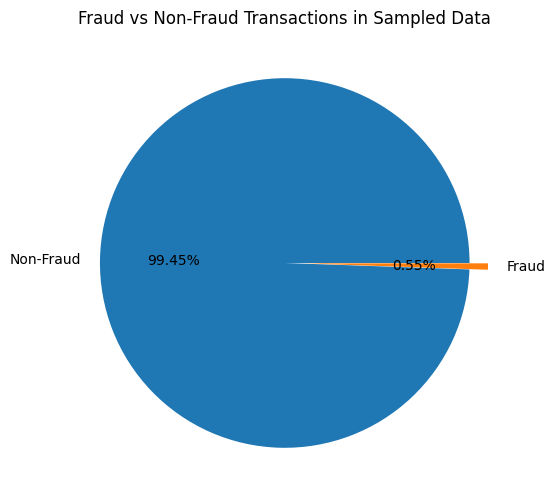

In [ ]:
# Value counts of fraud and non-fraud cases in the sampled data
fraud_counts = sample_df['is_fraud'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
fraud_counts.plot.pie(
    explode=[0, 0.1],
    autopct='%1.2f%%',
    labels=['Non-Fraud', 'Fraud']
)
plt.title('Fraud vs Non-Fraud Transactions in Sampled Data')
plt.ylabel('')  # Hides the default y-axis label
plt.show()

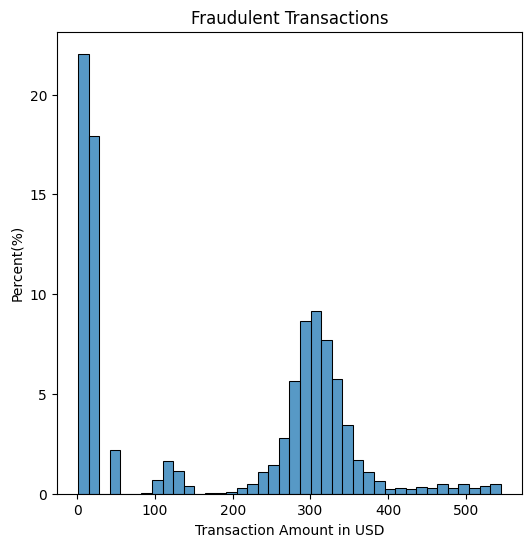

In [ ]:
p99 = train_df["amt"].quantile(0.99)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.histplot(x='amt', data=train_df[(train_df['is_fraud'] == 1) & (train_df['amt'] <= p99)], stat='percent', bins=40, ax=ax)
ax.set_xlabel('Transaction Amount in USD')
ax.set_ylabel('Percent(%)')
ax.set_title('Fraudulent Transactions')
plt.show()

## Convert Transaction Date & Time Column to Numerical Feature

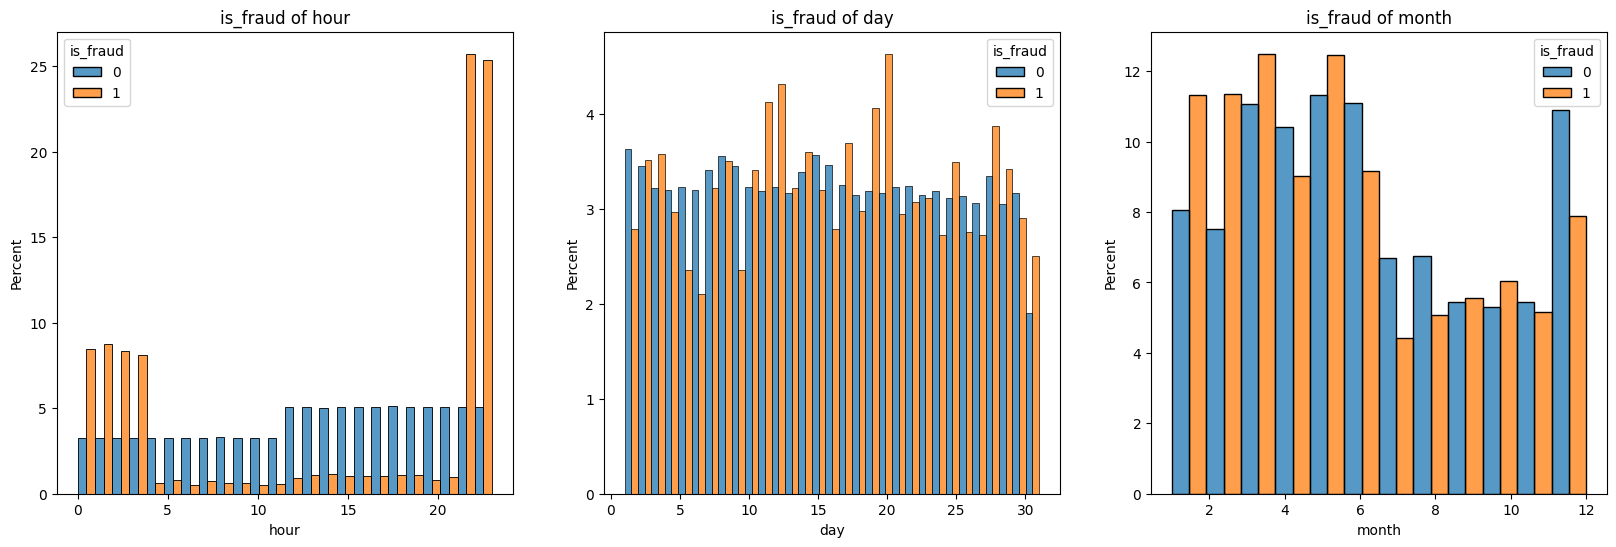

In [ ]:
# Looking at fraud frequency based on the hour, day, and month
hour = pd.to_datetime(train_df['trans_date_trans_time']).dt.hour
day = pd.to_datetime(train_df['trans_date_trans_time']).dt.day
month = pd.to_datetime(train_df['trans_date_trans_time']).dt.month
is_fraud = train_df['is_fraud']
train_time_df = pd.DataFrame({'hour': hour, 'day': day, 'month': month, 'is_fraud': is_fraud})
train_time_df

fig, ax = plt.subplots(1,3, figsize=(20, 6))

# hour
sns.histplot(x='hour', data=train_time_df, hue='is_fraud', stat='percent', multiple='dodge', common_norm=False, bins=24, ax=ax[0])
ax[0].set_title('is_fraud of hour')

# day
sns.histplot(x='day', data=train_time_df, hue='is_fraud', stat='percent', multiple='dodge', common_norm=False, bins=31, ax=ax[1])
ax[1].set_title('is_fraud of day')

# month
sns.histplot(x='month', data=train_time_df, hue='is_fraud', stat='percent', multiple='dodge', common_norm=False, bins=12, ax=ax[2])
ax[2].set_title('is_fraud of month')

plt.show()

          category  not fraud percentage  fraud percentage      diff
0    gas_transport              0.101648          0.082334 -0.019314
1             home              0.095346          0.026379 -0.068967
2      grocery_pos              0.094553          0.232214  0.137661
3     shopping_pos              0.089848          0.112310  0.022462
4        kids_pets              0.087495          0.031841 -0.055654
5     shopping_net              0.074335          0.228217  0.153883
6    entertainment              0.072745          0.031042 -0.041703
7      food_dining              0.070829          0.020117 -0.050711
8    personal_care              0.070230          0.029310 -0.040920
9   health_fitness              0.066513          0.017719 -0.048793
10        misc_pos              0.061594          0.033307 -0.028287
11        misc_net              0.048382          0.121902  0.073521
12     grocery_net              0.035153          0.017852 -0.017300
13          travel              0.

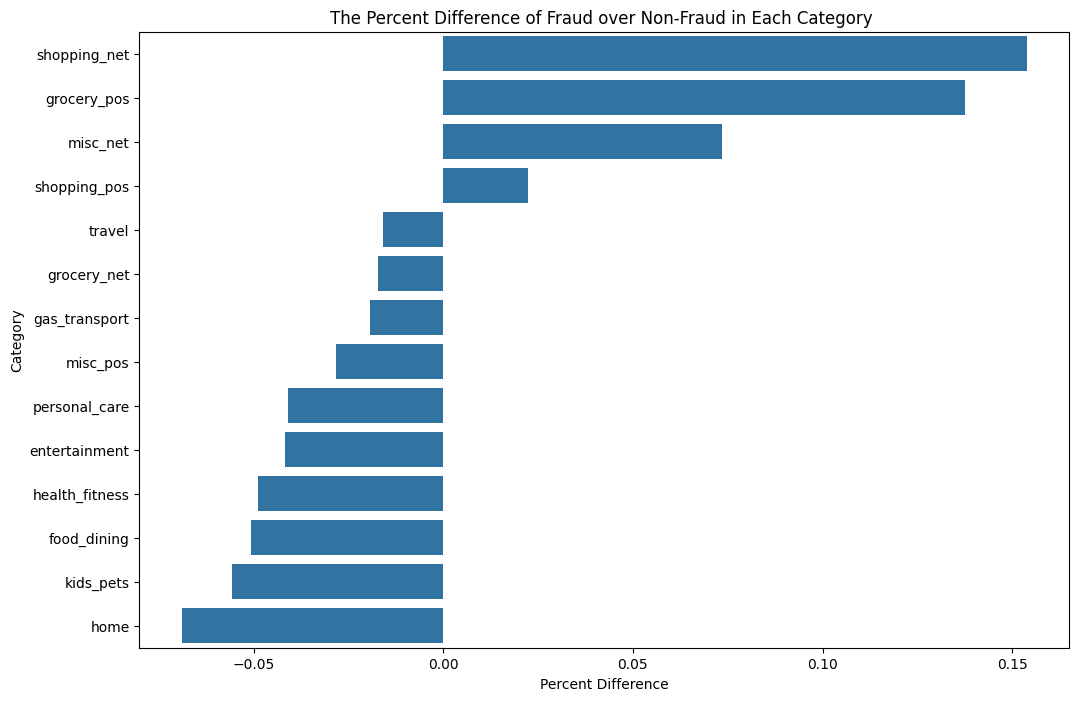

In [ ]:
#Calculate Normalized Percentages for Non-Fraudulent Transactions
a = train_df[train_df['is_fraud'] == 0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns = ['category', 'not fraud percentage']

#Calculate Normalized Percentages for Fraudulent Transactions
b = train_df[train_df['is_fraud'] == 1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns = ['category', 'fraud percentage']

#Merge Fraud and Non-Fraud Percentages
ab = a.merge(b, on='category')
#Calculate the Percentage Difference
ab['diff'] = ab['fraud percentage'] - ab['not fraud percentage']
print(ab)

#Visualize the Results
plt.figure(figsize=(12, 8))
ax = sns.barplot(y='category', x='diff', data=ab.sort_values('diff', ascending=False))
ax.set_xlabel('Percent Difference')
ax.set_ylabel('Category')
plt.title('The Percent Difference of Fraud over Non-Fraud in Each Category ')
plt.show()

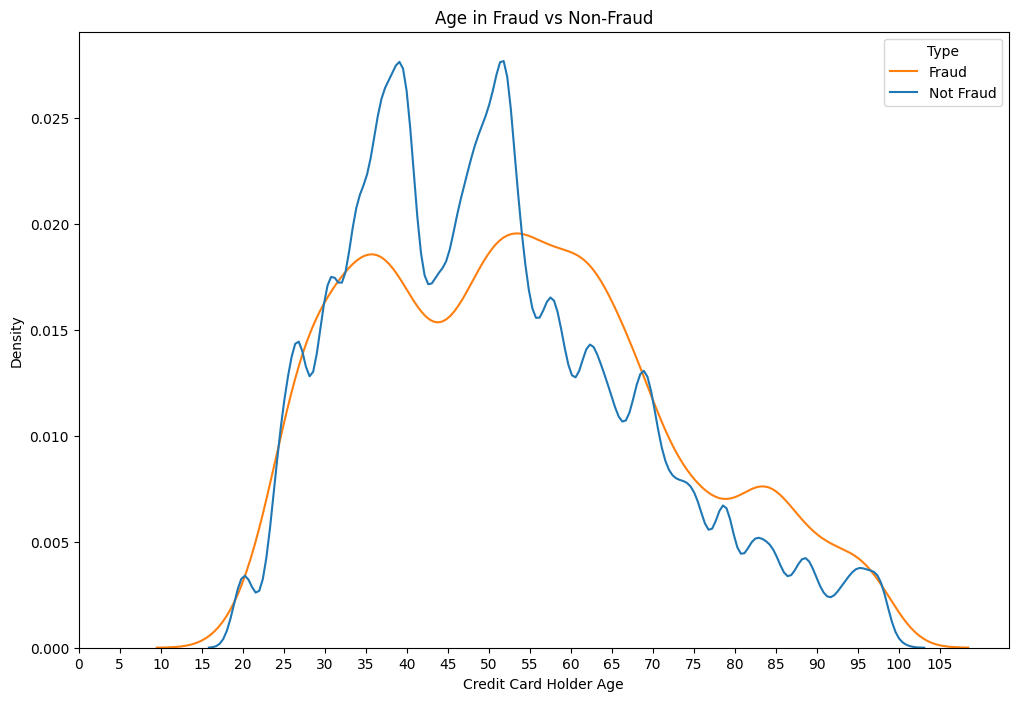

In [ ]:
# Ages that are more sucesptible to fraud vs not fraud
plt.figure(figsize=(12, 8))


train_df['age'] = dt.date.today().year - pd.to_datetime(train_df['dob']).dt.year
test_df['age'] = dt.date.today().year - pd.to_datetime(test_df['dob']).dt.year

ax = sns.kdeplot(x='age', data=train_df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age in Fraud vs Non-Fraud')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

plt.show()

In [ ]:
# State-Level Aggregation
# Fraudulent Transactions by State
train_state_fraud = train_df.groupby('state').agg(is_fraud=('is_fraud', 'sum')).sort_values('is_fraud', ascending=False)
train_state_fraud.reset_index(inplace=True)

# Create Subplots
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"type": "choropleth"}]]
)

# Fraudulent Transactions Map
fig.add_trace(go.Choropleth(
    locations=train_state_fraud['state'],  # State abbreviations
    z=train_state_fraud['is_fraud'].astype(float),  # Fraud counts
    locationmode='USA-states',
    colorscale='Reds',  # Changed to 'Reds' for a red colorscale
    text=train_state_fraud['state'],  # Hover text
    colorbar=dict(title="Fraud Count")  # Color bar with title
), row=1, col=1)

# Configure Map Scope and Centering
fig.update_geos(
    scope='usa',
    projection_type="albers usa",  # Use Albers USA projection for better centering
    row=1, col=1
)

# Update Layout
fig.update_layout(
    title_text="Fraud Transactions by State",
    title_x=0.5,  # Center the title
    title_xanchor='center'
)

# Show State-Level Maps
fig.show()

# Feature Engineering & Creating Sample Datasets

In [ ]:
numeric_df = train_df.select_dtypes(include=['number'])
numerical_features = train_df.select_dtypes(include=['number']).columns
print( numerical_features)
print(train_df['is_fraud'])
X_train = train_df[numerical_features]
y_train = X_train.pop('is_fraud')
print(X_train.info(), y_train.info())

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'hour', 'day',
       'month'],
      dtype='object')
0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1296675 non-null  int64  
 1   cc_num      1296675 non-null  int64  
 2   amt         1296675 non-null  float64
 3   zip         1296675 non-null  int64  
 4   lat         1296675 non-null  float64
 5   long        1296675 non-null  float64
 6   city_pop    1296675 non-null  int64  
 7   unix_time   1296675 non-null  int64  
 8   merch_lat   1296675 non-null  float64
 9   merch_long  1296675 non-null  float

In [ ]:
train_df[['hour', 'day', 'month']] = train_time_df[['hour', 'day', 'month']]
collected_columns = ['is_fraud', 'hour', 'day', 'month', 'category', 'amt', 'city', 'state', 'zip', 'city_pop', 'unix_time', 'age']
collected_train_df = train_df[collected_columns]
collected_train_df.corr(numeric_only=True)

#new_train = collected_train_df.copy()

# print(f"unique number of category: {collected_train_df['category'].nunique()}")
# print(f"unique number of city: {collected_train_df['city'].nunique()}")
# print(f"unique number of state: {collected_train_df['state'].nunique()}")
# print(collected_train_df.info())

# Label Encoding

train_df

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()
# Fit and transform the 'category' column
collected_train_df.loc[:, 'enc_category'] = le.fit_transform(collected_train_df['category'])

# Initialize LabelEncoder
le = LabelEncoder()
# Fit and transform the 'city' column
collected_train_df.loc[:, 'enc_city'] = le.fit_transform(collected_train_df['city'])
# Check the shape of the encoded data

# Initialize LabelEncoder
le = LabelEncoder()
# Fit and transform the 'state' column
collected_train_df.loc[:, 'enc_state'] = le.fit_transform(collected_train_df['state'])
# Check the shape of the encoded data



test_df

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Ensure collected_test_df is a copy to avoid SettingWithCopyWarning
collected_test_df = collected_test_df.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform each column, using .loc for assignments
collected_test_df.loc[:, 'enc_category'] = le.fit_transform(collected_test_df['category'])
collected_test_df.loc[:, 'enc_city'] = le.fit_transform(collected_test_df['city'])
collected_test_df.loc[:, 'enc_state'] = le.fit_transform(collected_test_df['state'])

# Check the shapes
# print(collected_test_df['enc_category'].shape)
# print(collected_test_df['enc_city'].shape)
# print(collected_test_df['enc_state'].shape)
print(collected_test_df.info())
print(collected_train_df.info())

test = collected_test_df.select_dtypes(include=['number'])
print(test.info())
train = collected_train_df.select_dtypes(include=['number'])
print(train.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   is_fraud      555719 non-null  int64  
 1   hour          555719 non-null  int32  
 2   day           555719 non-null  int32  
 3   month         555719 non-null  int32  
 4   category      555719 non-null  object 
 5   amt           555719 non-null  float64
 6   city          555719 non-null  object 
 7   state         555719 non-null  object 
 8   zip           555719 non-null  int64  
 9   city_pop      555719 non-null  int64  
 10  unix_time     555719 non-null  int64  
 11  age           555719 non-null  int32  
 12  enc_category  555719 non-null  int64  
 13  enc_city      555719 non-null  int64  
 14  enc_state     555719 non-null  int64  
dtypes: float64(1), int32(4), int64(7), object(3)
memory usage: 55.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entri

In [ ]:
print(test.head())

   is_fraud  hour  day  month    amt    zip  city_pop   unix_time  age  \
0         0    12   21      6   2.86  29209    333497  1371816865   56   
1         0    12   21      6  29.84  84002       302  1371816873   34   
2         0    12   21      6  41.28  11710     34496  1371816893   54   
3         0    12   21      6  60.05  32780     54767  1371816915   37   
4         0    12   21      6   3.19  49632      1126  1371816917   69   

   enc_category  enc_city  enc_state  
0            10       157         39  
1            10        16         43  
2             5        61         33  
3             9       764          8  
4            13       247         21  


In [ ]:
#collected_train_df.corr(numeric_only=True)
#numerical_columns = ['hour', 'day', 'month', 'amt', 'zip', 'city_pop', 'unix_time', 'age', 'enc_category', 'enc_city', 'enc_state']
numerical_features_train = collected_train_df.corr(numeric_only=True).columns
categorical_features_train = [col for col in collected_train_df.columns if col not in numerical_features_train] # Use numerical_features_train instead of numerical_features

print(numerical_features_train)
print(categorical_features_train)

Index(['is_fraud', 'hour', 'day', 'month', 'amt', 'zip', 'city_pop',
       'unix_time', 'age', 'enc_category', 'enc_city', 'enc_state'],
      dtype='object')
['category', 'city', 'state']


In [ ]:
numerical_features = combined_df.select_dtypes(include=['number']).columns
categorical_features = combined_df.select_dtypes(include=['object', 'category']).columns

print(numerical_features)
print(categorical_features)

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')


split X_train, y_train

In [ ]:
X_train = collected_train_df[['hour', 'day', 'month', 'amt', 'zip', 'city_pop', 'unix_time', 'enc_category', 'enc_city', 'enc_state']]
y_train = collected_train_df['is_fraud']

print(X_train.shape)
print(y_train.shape)

(1296675, 10)
(1296675,)


# Data Scaling

train_df

In [ ]:
from sklearn.preprocessing import StandardScaler
# temporary separate
X = train.drop(columns=['is_fraud'])
y = train['is_fraud']

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
# Convert back to a DataFrame for better readability
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)
# Reattach the target column
new_train = pd.concat([X_normalized, y.reset_index(drop=True)], axis=1)

print(new_train.head(), new_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   hour          1296675 non-null  float64
 1   day           1296675 non-null  float64
 2   month         1296675 non-null  float64
 3   amt           1296675 non-null  float64
 4   zip           1296675 non-null  float64
 5   city_pop      1296675 non-null  float64
 6   unix_time     1296675 non-null  float64
 7   age           1296675 non-null  float64
 8   enc_category  1296675 non-null  float64
 9   enc_city      1296675 non-null  float64
 10  enc_state     1296675 non-null  float64
 11  is_fraud      1296675 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 118.7 MB
       hour       day     month       amt       zip  city_pop  unix_time  \
0 -1.878145 -1.652258 -1.504564 -0.407826 -0.749136 -0.282589  -1.858664   
1 -1.878145 -1.652258 -1.504564  0.230039  1.872567 

test_df

In [ ]:
# temporarily separate
x = test.drop(columns=['is_fraud'])
Y = test['is_fraud']

scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)
# Convert back to a DataFrame for better readability
x_normalized = pd.DataFrame(x_normalized, columns=x.columns)
# Reattach the target column
new_test = pd.concat([x_normalized, Y.reset_index(drop=True)], axis=1)

print(new_test.head(), new_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   hour          555719 non-null  float64
 1   day           555719 non-null  float64
 2   month         555719 non-null  float64
 3   amt           555719 non-null  float64
 4   zip           555719 non-null  float64
 5   city_pop      555719 non-null  float64
 6   unix_time     555719 non-null  float64
 7   age           555719 non-null  float64
 8   enc_category  555719 non-null  float64
 9   enc_city      555719 non-null  float64
 10  enc_state     555719 non-null  float64
 11  is_fraud      555719 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 50.9 MB
       hour       day     month       amt       zip  city_pop  unix_time  \
0 -0.118789  0.506526 -1.773597 -0.424463 -0.731091  0.816521  -1.703871   
1 -0.118789  0.506526 -1.773597 -0.252337  1.309217 -0.292685  -1.703

In [ ]:

from sklearn.model_selection import train_test_split
# Stratified sampling on the training set
X_train_sampled, _, y_train_sampled, _ = train_test_split(
    X_normalized, y, test_size=0.8, stratify=y, random_state=42)
# stratified df
new_train = pd.concat([pd.DataFrame(X_train_sampled), pd.Series(y_train_sampled, name="is_fraud")], axis=1)
# Save stratified df
new_train.to_csv('new_train.csv', index=False)

# Stratified sampling on the test set
X_test_sampled, _, y_test_sampled, _ = train_test_split(
    x_normalized, Y, test_size=0.8, stratify=Y, random_state=42)
# stratified df
new_test = pd.concat([pd.DataFrame(X_test_sampled), pd.Series(y_test_sampled, name="is_fraud")], axis=1)
# Save stratified df
new_test.to_csv('new_test.csv', index=False)

print(new_train.info(), new_test.info())

from google.colab import files

# Download training set
files.download('new_train.csv')

# Download testing set
files.download('new_test.csv')


<class 'pandas.core.frame.DataFrame'>
Index: 259335 entries, 804118 to 375392
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   hour          259335 non-null  float64
 1   day           259335 non-null  float64
 2   month         259335 non-null  float64
 3   amt           259335 non-null  float64
 4   zip           259335 non-null  float64
 5   city_pop      259335 non-null  float64
 6   unix_time     259335 non-null  float64
 7   age           259335 non-null  float64
 8   enc_category  259335 non-null  float64
 9   enc_city      259335 non-null  float64
 10  enc_state     259335 non-null  float64
 11  is_fraud      259335 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 25.7 MB
<class 'pandas.core.frame.DataFrame'>
Index: 111143 entries, 134502 to 554805
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   hour          111

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## More EDA

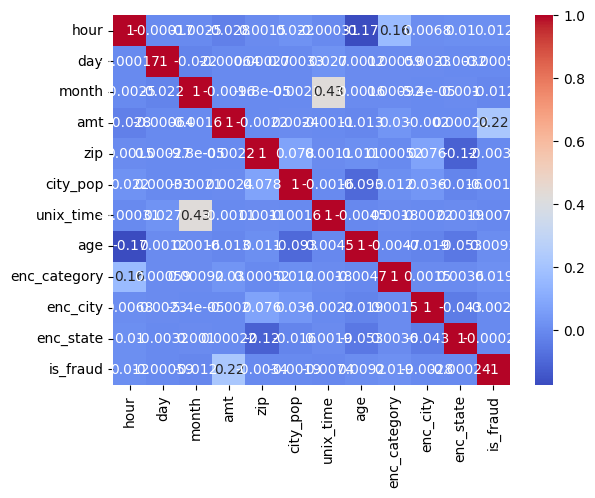

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix only for numeric columns
# Select only numeric columns for correlation calculation
combined_df = pd.concat([new_train, new_test], ignore_index=True)
numeric_df = combined_df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

# Multicollinearity
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
numeric_df = combined_df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
target_correlation = corr_matrix['is_fraud'].sort_values(ascending=False)
print(target_correlation)

is_fraud        1.000000
amt             0.219749
enc_category    0.018669
hour            0.012252
age             0.009174
enc_state      -0.000240
day            -0.000592
city_pop       -0.001866
enc_city       -0.002828
zip            -0.003366
unix_time      -0.007442
month          -0.012064
Name: is_fraud, dtype: float64


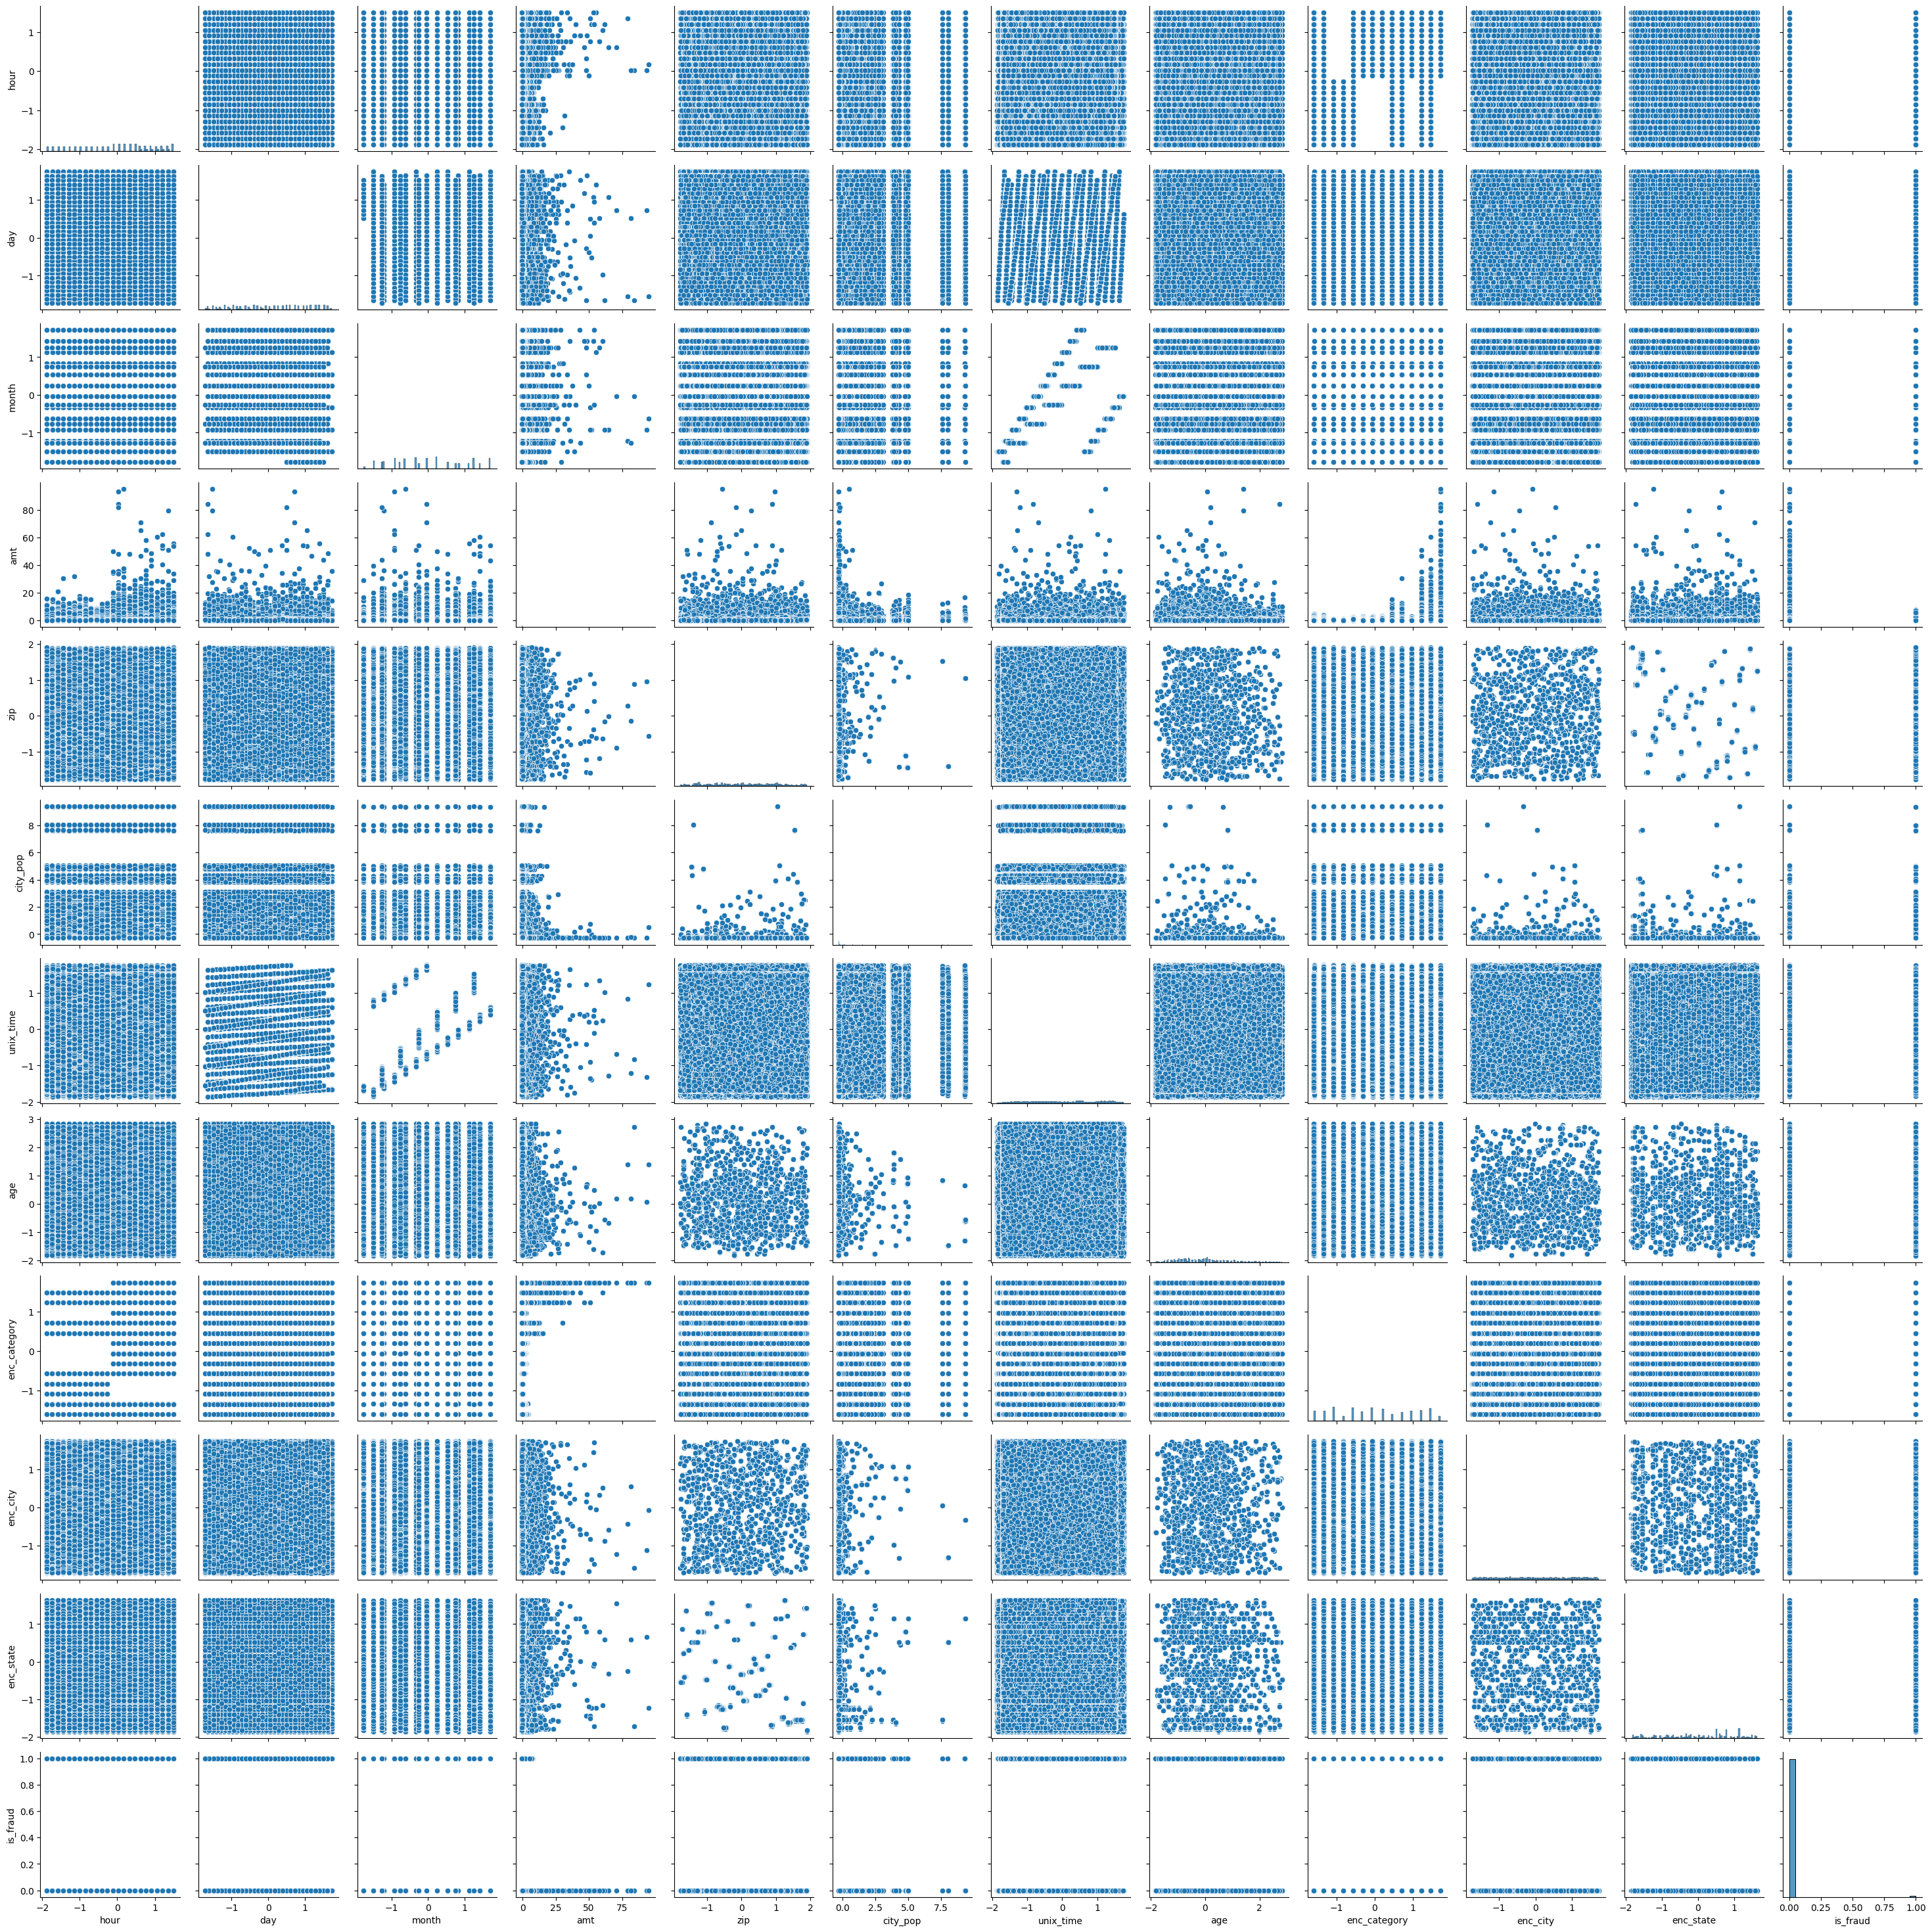

In [ ]:
numeric_df = combined_df.select_dtypes(include=['number'])
g = sns.PairGrid(numeric_df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

In [ ]:
#dependencies between variables
from sklearn.feature_selection import mutual_info_classif
numerical_features = combined_df.select_dtypes(include=['number']).columns
print( numerical_features)
print(combined_df['is_fraud'])
X_train = combined_df[numerical_features]
y_train = X_train.pop('is_fraud')

mi = mutual_info_classif(X_train, y_train)
print(mi)

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
0          0
1          0
2          0
3          0
4          0
          ..
1852389    0
1852390    0
1852391    0
1852392    0
1852393    0
Name: is_fraud, Length: 1852394, dtype: int64
[4.99261899e-03 3.26104781e-03 1.57728011e-02 3.99887660e-03
 4.02664967e-03 3.89803662e-03 3.02117515e-03 6.31919484e-03
 1.01773862e-04 3.26595860e-05]
